PROJECT ML

Probability Practice

In [2]:
"""
PART A:
P(Y) = P(Y | RC) * P(RC) + P(Y | TC) * P(TC)

P(RC) = 0.3, P(Y | RC) = 0.5, P(Y) = .65, P(N) = .35

P(Y | TC) = (P(Y) - P(Y | A) * P(A)) / P(B)

 P(Y | TC) = (0.65 - 0.5 * 0.3) / P(TC)

P(TC) + P(RC) = 1, so P(TC) = 1 - P(RC),  P(TC) = 1 - 0.3, P(TC) = 0.7

P(Y | TC) = (0.65 - 0.5 * 0.3) / 0.7
P(Y | TC) = 0.5

Part B:
Use Bayes:

P(D | P) = (P(P | D) * P(D)) / P(P)

The probability of testing positive if someone has the disease, P(P | D) = .993
The probability of testing negative if someone does not have the disease, P(N | ND) 
The probability of having the disease in the general population, P(D) = 0.000025
We need to find P to use our bayes formula, so we use total prob

P(P) = P(P | D) * P(D) + P(P | ND) * P(ND)

P(P | ND) = 1 - P(N | ND) = 1 - 0.9999 = 0.0001

P(P) = P(P | D) * P(D) + P(P | D') * P(ND') P(P) = 0.993 * 0.000025 + 0.0001 * 0.999975
 P(P) = 0.000024825 + 0.0000999975 
P(P) = 0.0001248

Now plug into Bayes

P(D | P) = (P(P | D) * P(D)) / P(P)
 P(D | P) = (0.993 * 0.000025) / 0.0001248 
P(D | P) = .199 = 19.9%

The probability that some has the disease given they test positive is .199

"""

"\nPART A:\nP(Y) = P(Y | RC) * P(RC) + P(Y | TC) * P(TC)\n\nP(RC) = 0.3, P(Y | RC) = 0.5, P(Y) = .65, P(N) = .35\n\nP(Y | TC) = (P(Y) - P(Y | A) * P(A)) / P(B)\n\n P(Y | TC) = (0.65 - 0.5 * 0.3) / P(TC)\n\nP(TC) + P(RC) = 1, so P(TC) = 1 - P(RC),  P(TC) = 1 - 0.3, P(TC) = 0.7\n\nP(Y | TC) = (0.65 - 0.5 * 0.3) / 0.7\nP(Y | TC) = 0.5\n\nPart B:\nUse Bayes:\n\nP(D | P) = (P(P | D) * P(D)) / P(P)\n\nThe probability of testing positive if someone has the disease, P(P | D) = .993\nThe probability of testing negative if someone does not have the disease, P(N | ND) \nThe probability of having the disease in the general population, P(D) = 0.000025\nWe need to find P to use our bayes formula, so we use total prob\n\nP(P) = P(P | D) * P(D) + P(P | ND) * P(ND)\n\nP(P | ND) = 1 - P(N | ND) = 1 - 0.9999 = 0.0001\n\nP(P) = P(P | D) * P(D) + P(P | D') * P(ND') P(P) = 0.993 * 0.000025 + 0.0001 * 0.999975\n P(P) = 0.000024825 + 0.0000999975 \nP(P) = 0.0001248\n\nNow plug into Bayes\n\nP(D | P) = (P(P | 

Wrangling the Billboard Top 100

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
    year  unique_song_count
0   1958                352
1   1959                663
2   1960                700
3   1961                779
4   1962                768
..   ...                ...
59  2017                574
60  2018                704
61  2019                633
62  2020                804
63  2021                357

[64 rows x 2 columns]


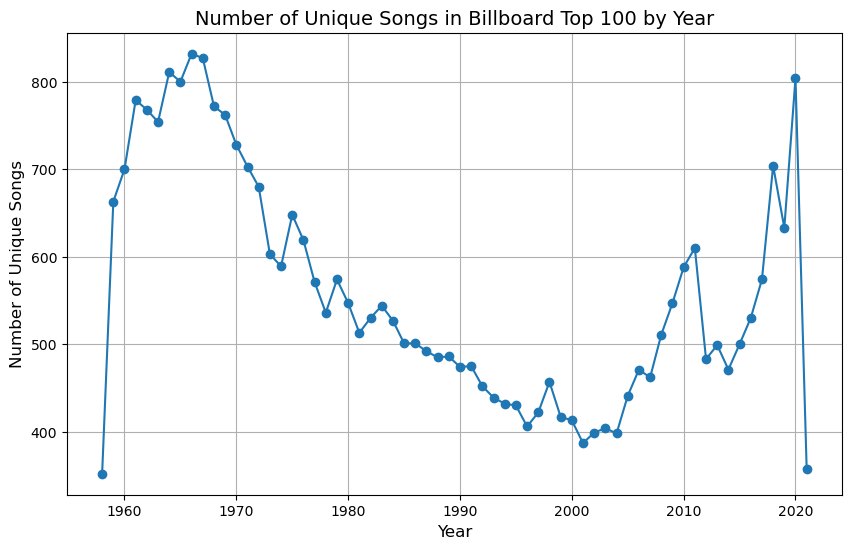

                performer  ten_week_hits
0              Elton John             52
1                 Madonna             44
2           Kenny Chesney             42
3              Tim McGraw             39
4             Keith Urban             36
5           Stevie Wonder             36
6            Taylor Swift             35
7         Michael Jackson             34
8      The Rolling Stones             33
9             Rod Stewart             33
10             Billy Joel             32
11          Rascal Flatts             31
12                  Drake             31
13                Chicago             31
14          George Strait             30
15  Daryl Hall John Oates             30
16           Brad Paisley             30
17           Neil Diamond             30
18           Jason Aldean             30


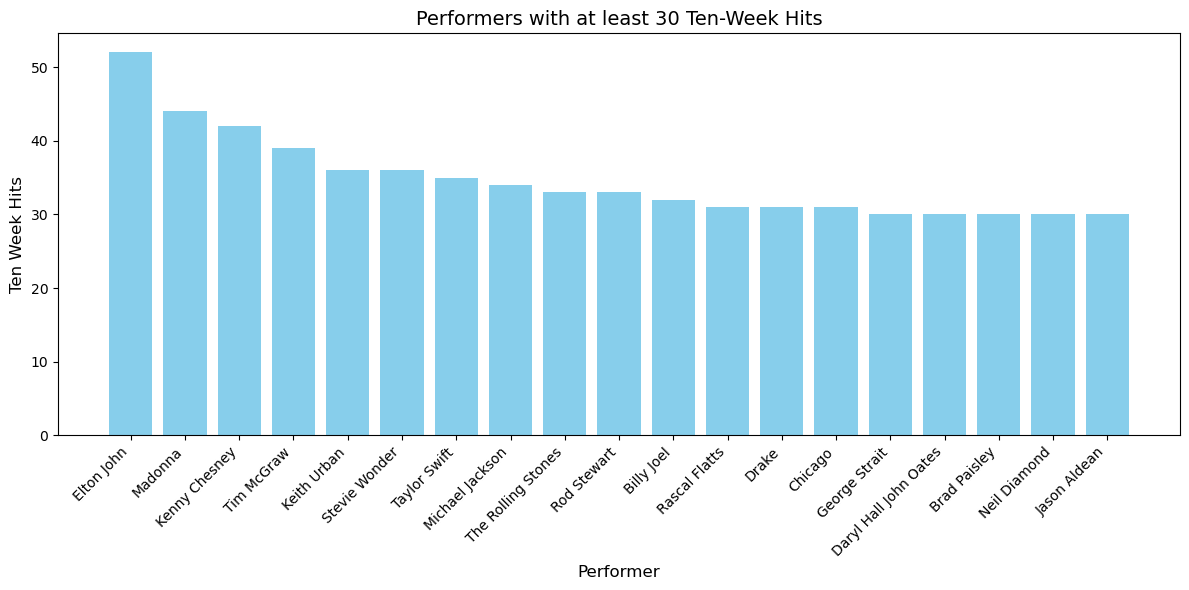

In [3]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

# Read in csv
df_billboard = pd.read_csv('C:/Users/ewm582/Downloads/billboard (1).csv')
df_billboard

# PART A
# drop the columns from the first data set
df_billboard['week'] = pd.to_datetime(df_billboard['week'])

# Group by 'performer' and 'song', and calculate the count of weeks each song appeared in the Billboard Top 100
grouped_df = df_billboard.groupby(['performer', 'song'], as_index=False)['week'].count()
grouped_df.rename(columns={'week': 'count'}, inplace=True)

# Sort the DataFrame in descending order of the count variable
grouped_df.sort_values(by='count', ascending=False, inplace=True)

# Display the resulting table
grouped_df[:10]

# PART B
# We want to count how many unique songs showed up on the chart per year
# song_id because there are multiple songs with the same title
unique_songs_count_by_year = df_billboard.groupby('year')['song_id'].nunique().reset_index()
unique_songs_count_by_year.rename(columns={'song_id': 'unique_song_count'}, inplace=True)

# Display the resulting table for the unique songs count by year
print(unique_songs_count_by_year)



import matplotlib.pyplot as plt

# Calculate the number of unique songs that appeared on the Top 100 in each year
unique_songs_count_by_year = df_billboard.groupby('year')['song_id'].nunique().reset_index()
unique_songs_count_by_year.rename(columns={'song_id': 'unique_song_count'}, inplace=True)

# Line plot for the number of unique songs by year
plt.figure(figsize=(10, 6))
plt.plot(unique_songs_count_by_year['year'], unique_songs_count_by_year['unique_song_count'], marker='o', linestyle='-')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unique Songs', fontsize=12)
plt.title('Number of Unique Songs in Billboard Top 100 by Year', fontsize=14)
plt.grid(True)
plt.show()

# PART C
# get songs that were 10 week hits
# Filter data to include only songs that appeared on Billboard Top 100 for at least ten weeks
ten_week_hits = grouped_df[grouped_df['count'] >= 10]
performer_count = ten_week_hits['performer'].value_counts()
performer_count_df = pd.DataFrame({'performer': performer_count.index, 'ten_week_hits': performer_count.values}) # make df

performer_count_over_30 = performer_count_df[performer_count_df['ten_week_hits'] >= 30] # df with ten week hits >= 30
print(performer_count_over_30)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(performer_count_over_30['performer'], performer_count_over_30['ten_week_hits'], color='skyblue')
plt.xlabel('Performer', fontsize=12)
plt.ylabel('Ten Week Hits', fontsize=12)
plt.title('Performers with at least 30 Ten-Week Hits', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Optimization: Checking for multicollinearity, scaling/normalization, feature selection, & gradient descent

In [4]:
)

SyntaxError: unmatched ')' (687023194.py, line 1)

Index(['Age', 'DistanceFromHome', 'Education', 'Gender', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married'

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
4508,0.002510,0.000372,0.000093,0,0.000046,1.0,0.000392,12,0.000000,0.000093,...,0,0,0,0,0,1,0,0,0,0
3910,0.001083,0.000037,0.000075,1,0.000112,1.0,0.000037,25,0.000037,0.000112,...,0,0,0,0,0,1,0,0,1,0
918,0.002348,0.000982,0.000043,1,0.000213,1.0,0.000213,11,0.000085,0.000085,...,1,0,0,0,0,0,0,1,0,0
4761,0.000239,0.000005,0.000015,0,0.000010,1.0,0.000036,11,0.000010,0.000005,...,0,0,0,0,0,1,0,0,1,0
15,0.000498,0.000071,0.000047,1,0.000024,1.0,0.000024,12,0.000071,0.000071,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.000639,0.000146,0.000073,1,0.000037,1.0,0.000035,14,0.000000,0.000055,...,0,0,0,0,0,0,0,0,0,1
3264,0.000707,0.000185,0.000017,1,0.000034,1.0,0.000118,16,0.000000,0.000034,...,0,0,0,0,0,0,0,0,0,1
1653,0.000893,0.000149,0.000019,1,0.000037,1.0,0.000130,13,0.000019,0.000056,...,1,0,0,0,0,0,0,0,1,0
2607,0.001953,0.000333,0.000095,0,0.000048,1.0,0.000381,12,0.000048,0.000095,...,0,0,0,0,1,0,0,0,0,1


Accuracy Score: 78.93075923519585 %
Accuracy Score: 75.0 %


Train Accuracy Score (with Lasso): 79.0792648969742 %
Test Accuracy Score (with Lasso): 75.0 %


/Users/morgantucker/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy Score (after Lasso and Gradient Descent): 69.61202895860404 %
Test Accuracy Score (after Lasso and Gradient Descent): 65.0 %
